# Modélisation

On part du lagrangien
$$L=\frac{m}{2}\left(\dot{r}^2+r^2\dot{\theta}^2\right) +mgr\cos(\theta)-\frac{k}{2}(r-l)^2.$$

Avec $\theta$ l'angle fait par le ressort avec la verticale, $r$ la longueur du ressort, $l$ la longueur du ressort au repos, $k$ la constante de raideur, $m$ la masse au bout du ressort et $g$ la constante de gravitation.

# Equations lagrangiennes

$$
\begin{cases}
\ddot{r}=\dot{\theta}^2r+g\cos(\theta)-\frac{k}{m}(r-l)\\
\ddot{\theta}=-\frac{g \sin(\theta)}{r}-\frac{2\dot{\theta}\dot{r}}{r}
\end{cases}
$$

# Equations Hamiltoniennes

$$
H=\frac{p^2}{2m}+\frac{\alpha^2}{2mr^2}-mgr\cos(\theta)+\frac{k(r-l)^2}{2}.$$

$$
\begin{cases}
\dot{r}=\frac{\partial H}{\partial p}=\frac{p}{m}\\
\dot{\theta}=\frac{\partial H}{\partial \alpha}=\frac{\alpha}{mr^2}\\
\dot{p}=-\frac{\partial H}{\partial r}=\frac{\alpha^2}{mr^3}+mg\cos(\theta)-k(r-l)\\
\dot{\alpha}=-\frac{\partial H}{\partial \theta}-mgr\sin(\theta)
\end{cases}
$$

# Discrétisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
%matplotlib inline
plt.rc('figure', figsize=(12, 9))

In [17]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.rcParams["animation.writer"] = "imagemagick"

**Définition des constantes**

In [18]:
m, g, k, l = 3, 10, 15, 1

**Définition du flux**

In [19]:
def flux(X, t):
    r, theta, p, alpha = X
    dr = p/m
    dtheta = alpha/(m*r**2)
    dp = alpha**2/(m*r**3)+m*g*np.cos(theta)-k*(r-l)
    dalpha = -m*g*r*np.sin(theta)
    return np.array([dr, dtheta, dp, dalpha])

**Donnée initiale et temps voulus**

In [20]:
ini = np.array([1.5, 3*np.pi/4, 0, 0])
temps = np.arange(0, 100, 0.1)

**Calcul de la solution**

In [21]:
resultat = odeint(func=flux, y0=ini, t=temps)
resultat.shape

(1000, 4)

** Affichage **

In [22]:
r, theta = resultat[:,0], resultat[:,1]

x, y = r*np.sin(theta), -r*np.cos(theta)

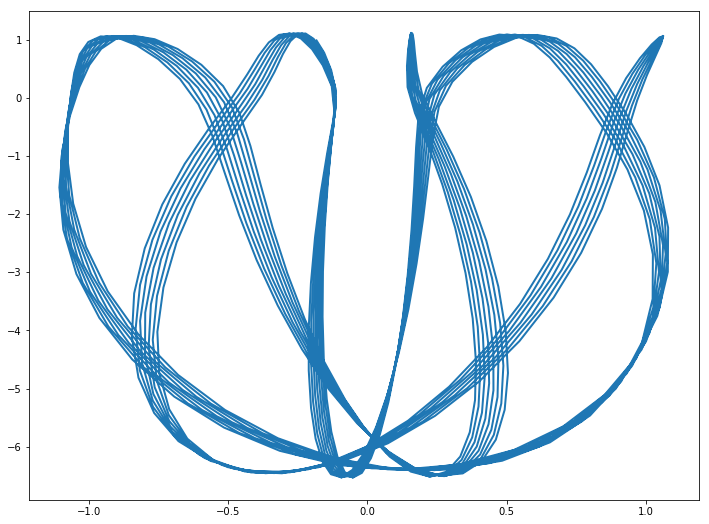

In [23]:
plt.plot(x, y, lw=2)

**Animation**

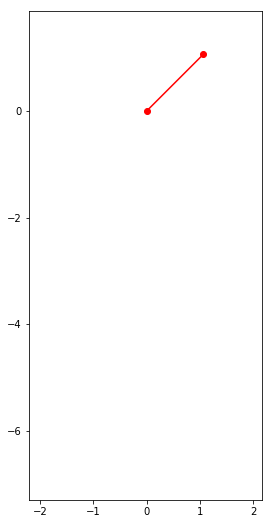

In [24]:
fig, ax = plt.subplots()

line, = ax.plot([],[], color="blue", ls="--")
tige, = ax.plot([], [], color="red", marker="o")

mi, ma = np.min(y), np.max(y)

ax.set_xlim([2*np.min(x), 2*np.max(x)])
ax.set_ylim([mi-0.1*(ma-mi), ma+0.1*(ma-mi)])
ax.axes.set_aspect("equal")


def animate(i):
    tige.set_data([0, x[i]],[0, y[i]])
    line.set_data(x[:i], y[:i])
    return tige, line

ani = FuncAnimation(fig=fig, func=animate, frames=range(len(x)), interval=100, blit=True)

In [25]:
HTML(ani.to_html5_video())

In [26]:
ani.save("test.gif")